# Ford GoBike Trip Data Analysis

In this part of project, our goal is to conduct an exploratory data analysis on Ford GoBike Trip dataset. We will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from simple univariate relationships up through multivariate relationships, but it does not need to be clean or perfect. This part of the project is gives opportunity to ask questions on data and make discoveries.


## Data Wrangling
Bike-sharing is gaining popularity, since it provides a convenient solution for short distance transportation, especially where the typical public transportation systems could not cover thoroughly. Riders can pick up a bike from one station and drop off at any other in the network. In return the system can keep on operating with income from: 1. rider membership fee, or 2. one time pay-to-ride rental fee.

This document explores a dataset containing information about individual rides of Ford GoBike sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time
import glob


%matplotlib inline

### 1- Data gathering and assessing 

The data can be directly downloaded from Ford GoBike. Data for 2017 is packed up in one CSV file, there are seperate files of each month from Jan. to Nov. I want to take a look of the data over a whole year on 2017, therefore, it requires some data wrangling to get one complete dataset.

#### What is the structure of your dataset?

In [2]:
# load in the data from 2017 into one dataframe 
df = pd.read_csv('2017-forgobike-tripdata.csv', parse_dates=True)
# overview of data shape and composition
print(df.shape)
print(df.dtypes)

(519700, 16)
Unnamed: 0                   int64
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


In [3]:
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
Unnamed: 0                 519700 non-null int64
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(5), object(6)
memory usage: 63.4+ MB


In [5]:
# There is no duplicate data
print(sum(df.duplicated()))

0


In [6]:
# Summery statistic of data 
df.describe()

,Unnamed: 0,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,259849.500000,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,150024.611786,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,0.000000,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,129924.750000,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,259849.500000,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,389774.250000,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,519699.000000,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


#### observation

- The time variables in this dataset are all string. They need to be converted to datetime format for the analysis.

- The time variables can be broken down into time of day, day of the week, or month of the year.

- The dataset provides membership birth year, so ages can be derived by using the year of the dataset, 2017.

- data type of start/end_station_id and bike_id should be string instead of float or int
- data type of memeber_birth_year should be int instead of float
- data type of user_type, member_gender should be categorical
- missing data in member_birth_year, member_gender
- erroneous data in member_birth_year

### The main feature(s) of interest in the dataset

I am most interested in figuring out the following featurs:
- when and where are most trips taken because this dataset includes start time/location and end time/location. I focus on the starting points first.

- what are the characteristics (age, sex, and user_type) of the riders and the duration of the trips in these time points and locations.
- Compare age of different user types and sex
- Number of trips taken by different user group and how user type, age, sex
- Compare some specification of 4 top more frequent start station 
- Correlation between age and duration second
- hourly trip count over the week
- How Trip duration affected by age, day of week and user type
- Ages of users in different user's group

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 I think membr_gender, birhth_day, start_time may affect  duration_sec and number of trip. I expect that number of riders for male are greater than female and subscribers greater than customers.  Also I expect that riders prefer morning or afternoon than night and during the week than weekend. 


### 2-Data Cleaning

First make a copy of the original DataFrame, then conduct the cleaning process.

In [7]:
df_clean = df.copy()

In [8]:
# For two last columns we have null values(member_age and member_birth_year)
sum(df_clean.isnull().values)

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0, 66541, 66462])

In [9]:
# check if there are duplicated data points
sum(df_clean.duplicated())

0

In [10]:
#  Convert time variables from string to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
# extract month charecter and number of the year
df_clean['start_month_num'] = df_clean['start_time'].apply(lambda time: time.month)
df_clean['start_month_char'] = df_clean['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [11]:
# Check start_month_num and start_month_char
print(df_clean['start_month_num'].value_counts())
print(df_clean['start_month_char'].value_counts())

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: start_month_num, dtype: int64
Oct    108937
Sep     98558
Nov     95612
Dec     86539
Aug     83292
Jul     44073
Jun      2689
Name: start_month_char, dtype: int64


In [12]:
# morning, afternoon, night of a day
df_clean['start_hour'] = df_clean['start_time'].apply(lambda time: time.hour)
df_clean['period_day'] = 'morning'
df_clean['period_day'][(df_clean['start_hour'] >= 12) & (df_clean['start_hour'] <= 17)] = 'afternoon'
df_clean['period_day'][(df_clean['start_hour'] >= 18) & (df_clean['start_hour'] <= 23)] = 'night'

C:\Users\Farhad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Farhad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:

# check start hour and time of day
print(df_clean['start_hour'].value_counts())
print(df_clean['period_day'].value_counts())

17    60111
8     57227
18    46088
9     45457
16    41339
15    28448
12    27448
13    27374
7     26800
19    26598
10    25217
14    24900
11    24303
20    16642
21    11993
6      8895
22     7967
23     4867
0      2606
5      2145
1      1377
2       860
4       640
3       398
Name: start_hour, dtype: int64
afternoon    209620
morning      195925
night        114155
Name: period_day, dtype: int64


In [14]:
# Day of the week
df_clean['start_weekday_num'] = df_clean['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_clean['start_weekday_char'] = df_clean['start_weekday_num'].map(dmap)

In [15]:
# Check  start_weekday_num and start_weekday_char
print(df_clean['start_weekday_num'].value_counts())
print(df_clean['start_weekday_char'].value_counts())

1    87865
2    87752
3    85243
0    81410
4    81165
5    50874
6    45391
Name: start_weekday_num, dtype: int64
Tue    87865
Wed    87752
Thu    85243
Mon    81410
Fri    81165
Sat    50874
Sun    45391
Name: start_weekday_char, dtype: int64


In [16]:
df_clean['start_time_month_date'] = df_clean['start_time'].map(lambda time: time.strftime('%m-%d'))

In [17]:
# Check start month date
print(df_clean['start_time_month_date'].value_counts())


10-26    4682
11-07    4528
11-14    4487
10-24    4473
12-06    4391
10-04    4380
11-09    4367
10-23    4356
10-25    4340
12-05    4338
12-07    4330
10-03    4323
12-11    4303
11-02    4299
12-12    4275
11-29    4270
11-30    4265
10-05    4265
12-13    4262
11-01    4259
12-14    4229
11-28    4221
10-27    4215
10-31    4209
11-06    4205
09-27    4183
09-28    4166
12-01    4124
11-08    4106
09-19    4098
         ... 
07-12    1556
07-11    1506
08-06    1494
12-26    1453
07-22    1449
12-30    1444
12-31    1410
07-10    1347
07-29    1333
07-30    1278
07-06    1277
07-23    1190
11-23    1186
07-07    1126
07-05    1103
07-15    1086
06-30    1038
06-29    1019
07-16     955
12-23     935
12-24     819
12-25     712
11-26     693
07-08     659
06-28     632
07-03     600
07-04     558
07-02     523
07-01     475
07-09     433
Name: start_time_month_date, Length: 187, dtype: int64


In [18]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'start_month_char': ['Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

In [19]:
df_clean.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,user_type,member_birth_year,member_gender,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,start_time_month_date
0,0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,...,Customer,1987.0,Male,12,Dec,16,afternoon,6,Sun,12-31
1,1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,...,Customer,1965.0,Female,12,Dec,15,afternoon,6,Sun,12-31
2,2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,...,Customer,NaN,NaN,12,Dec,22,night,6,Sun,12-31
3,3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),...,Customer,NaN,NaN,12,Dec,17,afternoon,6,Sun,12-31
4,4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,...,Subscriber,1997.0,Female,12,Dec,14,afternoon,6,Sun,12-31


In [20]:
# convert the user_type and member_gender to categorical data
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

In [21]:
df_clean.dtypes

Unnamed: 0                          int64
duration_sec                        int64
start_time                 datetime64[ns]
end_time                           object
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
start_month_num                     int64
start_month_char                 category
start_hour                          int64
period_day                       category
start_weekday_num                   int64
start_weekday_char               category
start_time_month_date              object
dtype: object

In [22]:
# convert the data type of member birth year t B NM,o int
df_clean['member_birth_year'] = df_clean['member_birth_year'].fillna(0).astype(int)

In [23]:
# create a new column of member age from member birth year
# filter out incorrect data
df_clean['member_age'] = 2017 - df_clean['member_birth_year']
df_clean.member_age.replace(2017, np.NaN, inplace=True)
df_clean = df_clean[df_clean.member_age < 80]

In [24]:
df_clean = df_clean[df_clean.member_age >= 10]

In [25]:
# Check age
df_clean['member_age'].describe()

count    452471.000000
mean         36.495466
std          10.187842
min          18.000000
25%          29.000000
50%          34.000000
75%          43.000000
max          79.000000
Name: member_age, dtype: float64

In [26]:
# check that no one has age greater than 80
df_clean.query('member_age >= 80')

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_birth_year,member_gender,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,start_time_month_date,member_age


In [27]:
#check that no one has age smaller than 10
df_clean.query('member_age <= 10')

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_birth_year,member_gender,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,start_time_month_date,member_age


In [28]:
# Summery statistic of age
df_clean.member_age.describe()

count    452471.000000
mean         36.495466
std          10.187842
min          18.000000
25%          29.000000
50%          34.000000
75%          43.000000
max          79.000000
Name: member_age, dtype: float64

In [29]:
# check data type again
df_clean.dtypes

Unnamed: 0                          int64
duration_sec                        int64
start_time                 datetime64[ns]
end_time                           object
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int32
member_gender                    category
start_month_num                     int64
start_month_char                 category
start_hour                          int64
period_day                       category
start_weekday_num                   int64
start_weekday_char               category
start_time_month_date              object
member_age                        

In [30]:
df_clean.end_station_name.nunique(), df_clean.end_station_id.nunique()


(272, 272)

In [31]:
#check unique data
df_clean.bike_id.nunique()


3670

In [30]:
# convert seconds to minutes
df_clean['duration_minutes'] = df_clean['duration_sec']/60
df_clean.head()


,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,start_time_month_date,member_age,member_age_bins,duration_minutes
0,0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,...,12,Dec,16,afternoon,6,Sun,12-31,30.0,20 - 30,1335.166667
1,1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,...,12,Dec,15,afternoon,6,Sun,12-31,52.0,50 - 60,1313.333333
4,4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,...,12,Dec,14,afternoon,6,Sun,12-31,20.0,10 - 20,726.716667
6,6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,...,12,Dec,23,night,6,Sun,12-31,26.0,20 - 30,75.116667
12,12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.7430,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,...,12,Dec,23,night,6,Sun,12-31,27.0,20 - 30,36.383333


##  Univariate Exploration

 ### 1- distribution of trip durations.

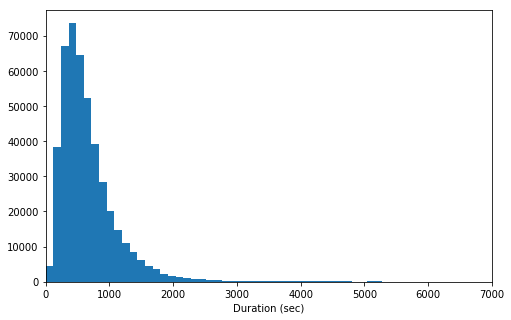

In [52]:
binsize = 60*2
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.xlim(0,7000)
plt.show()

The distribution is strongly right skewed. So I will check the distribution on a log scale.

In [53]:
np.log10(df_clean['duration_sec']).describe()

count    452471.000000
mean          2.750507
std           0.304808
min           1.785330
25%           2.561101
50%           2.745075
75%           2.923762
max           4.935769
Name: duration_sec, dtype: float64

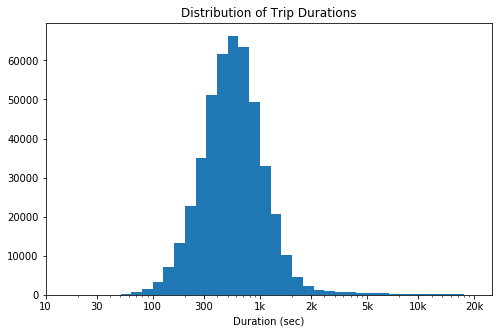

In [55]:
log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [10, 30, 100, 300, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (sec)')
plt.title('Distribution of Trip Durations')
plt.show()

When plotted on a log-scale, the duration distribution now seems normal distribution with one peak between 500 and 600 seconds.



### 2- distribution of user age, user type and gender

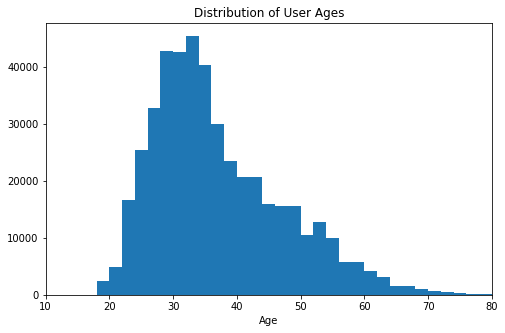

In [35]:
# distribution of age
binsize = 2
bins = np.arange(0, df_clean['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'member_age', bins = bins);
plt.xlim(10, 80)
plt.xlabel('Age');
plt.title('Distribution of User Ages');

In [53]:
df_clean['member_age'].describe()

count    452471.000000
mean         36.495466
std          10.187842
min          18.000000
25%          29.000000
50%          34.000000
75%          43.000000
max          79.000000
Name: member_age, dtype: float64

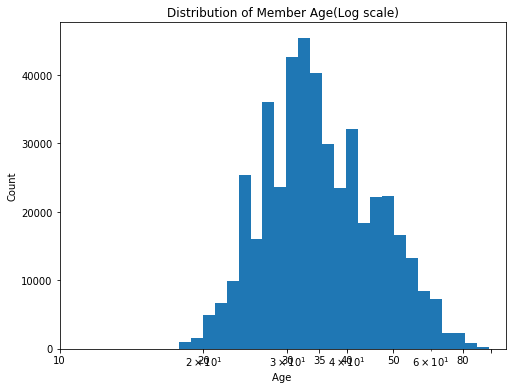

In [94]:
# there's a long tail in the distribution, so use log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_clean['member_age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_clean, x = 'member_age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,80], [10,20,30,35,40,50,80])
plt.xlabel('Age ')
plt.ylabel('Count')
plt.title('Distribution of Member Age(Log scale)');

In [ ]:
After putting our plot on log scale, it get close to normal distribution with the mean of 36

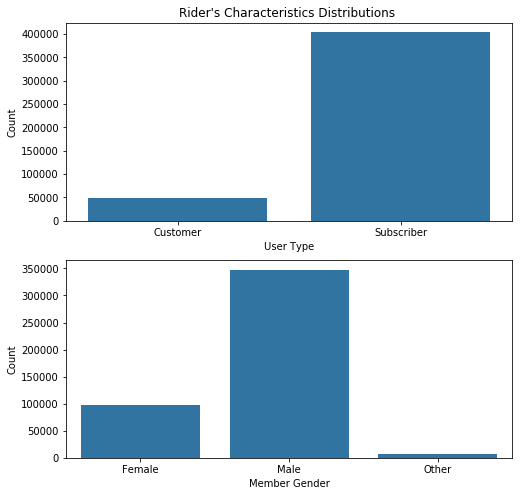

In [92]:
#  distributions of user type and gender
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = df_clean, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('Rider\'s Characteristics Distributions ');

Most of the users are Subscriber than Customer.
Most of the users are Male than Female  . Male  bike rides  is 3 times more than  female 


### 3- Month distribution 

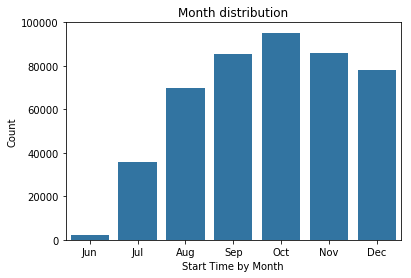

In [33]:

base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_month_char', color=base_color)
plt.xlabel('Start Time by Month')
plt.ylabel('Count')
plt.title('Month distribution');

October has the most and jun has the least number of trip

### 4- Weekday distribution 

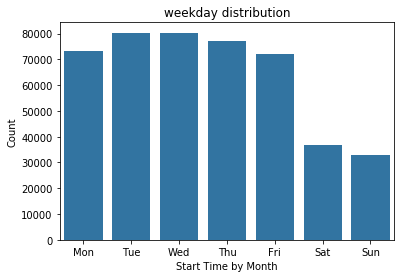

In [30]:

base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_weekday_char', color=base_color)
plt.xlabel('Start Time by weekday')
plt.ylabel('Count')
plt.title('weekday distribution');

Most trips took place during week days. And less trips are on weekends.

### 5- Start time distribution 

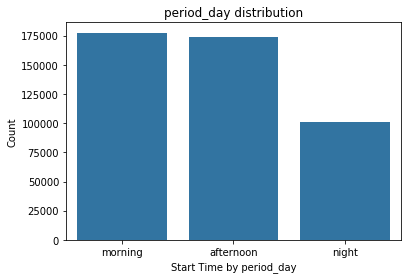

In [31]:


base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='period_day', color=base_color)
plt.xlabel('Start Time by period_day')
plt.ylabel('Count')
plt.title('period_day distribution');

Number of trip at night is less than morning and afternoon.

### 6-Top 10 stations with most trip ends

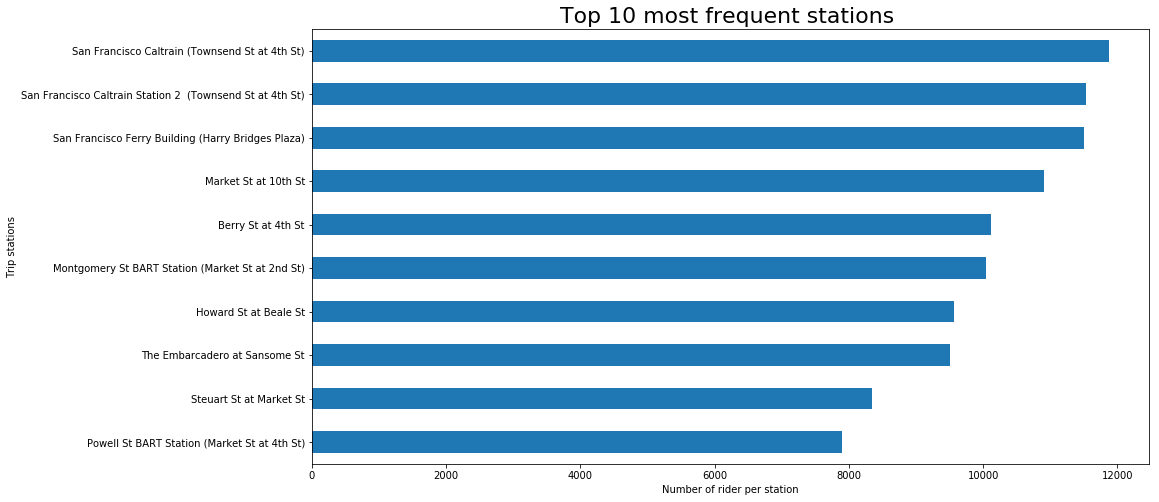

In [68]:
start_stn = df_clean["start_station_name"].value_counts().nlargest(10)
base_color = sb.color_palette()[0]
fig = plt.figure(figsize=(15,8))
start_stn.sort_values(ascending=True).plot(kind='barh', color=base_color)
plt.title("Top 10 most frequent stations ",fontsize=22)
plt.ylabel("Trip stations")
plt.xlabel("Number of rider per station");


### 7-Top 10 stations where most trip starts

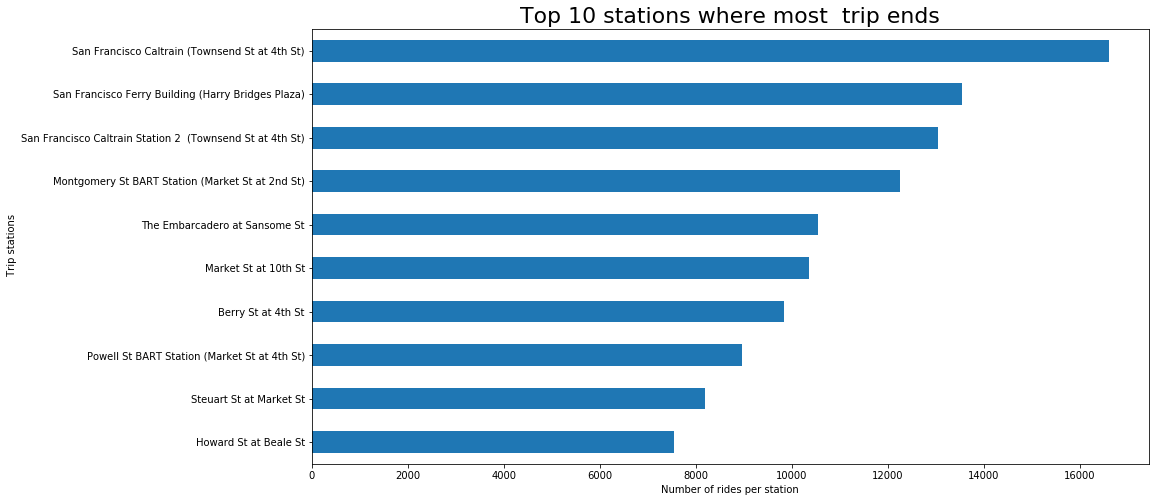

In [67]:
end_stn = df_clean["end_station_name"].value_counts().nlargest(10)
base_color = sb.color_palette()[0]
fig = plt.figure(figsize=(15,8))
end_stn.sort_values(ascending=True).plot(kind='barh', color=base_color)
plt.title("Top 10 stations where most  trip ends",fontsize=22)
plt.ylabel(" Trip stations")
plt.xlabel("Number of rides per station");


## Bivariate Exploration




### 1- Number of trip per user type during the day of the week

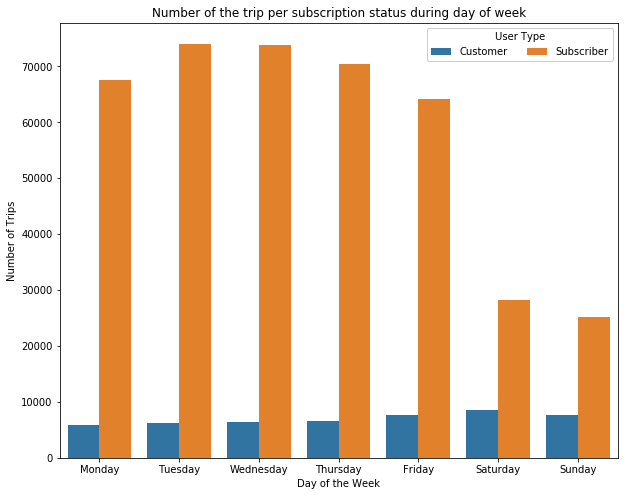

In [104]:

# create a clustered bar chart showing usage by day of the week and user type
plt.figure(figsize=(10,8))
ax = sb.countplot(data = df_clean, x = 'start_weekday_char', hue = 'user_type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'User Type')

ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks, labels)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of the trip per subscription status during day of week');

Number of trips for subscriber users is much more than customers during days of the week.

### 2- Number of trip per user type during the day of the week

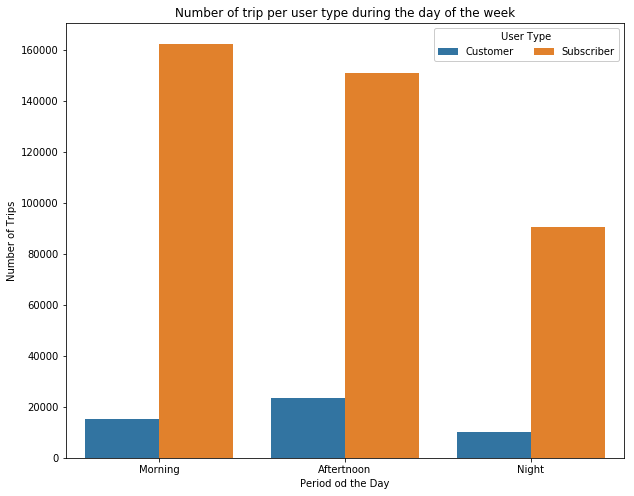

In [105]:
# create a clustered bar chart showing usage by day of the week and user type
plt.figure(figsize=(10,8))
ax = sb.countplot(data = df_clean, x = 'period_day', hue = 'user_type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'User Type')

ticks = [0, 1, 2]
labels = ['Morning','Aftertnoon','Night']
plt.xticks(ticks, labels)
plt.xlabel('Period od the Day')
plt.ylabel('Number of Trips')
plt.title('Number of trip per user type during the day of the week');

Number of trip for subscriber is much more than customer during the day.

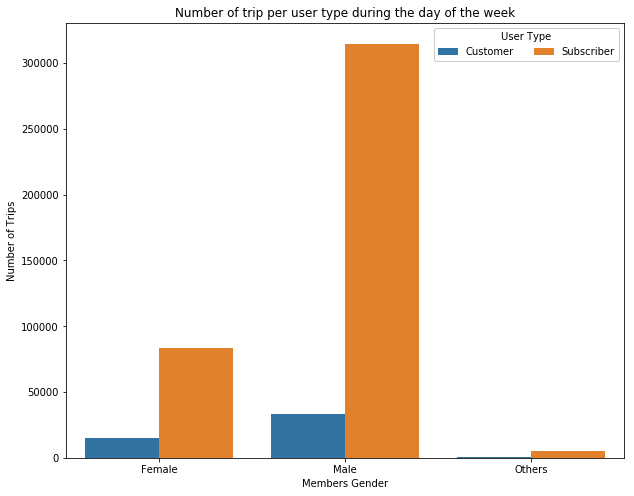

In [37]:
# create a clustered bar chart showing usage by day of the week and user type
plt.figure(figsize=(10,8))
ax = sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'User Type')

ticks = [0, 1, 2]
labels = ['Female','Male','Others']
plt.xticks(ticks, labels)
plt.xlabel('Members Gender')
plt.ylabel('Number of Trips')
plt.title('Number of trip per user type during the day of the week');

In [ ]:
Male have more number of trip than Female and Subscribers have more number of trip than customer

### 3- Correlation between age and duration second

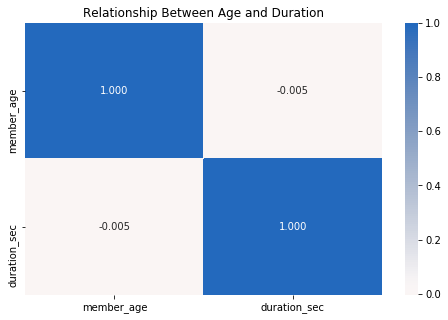

In [106]:
# Numeric variables: correlation between member age and duration second
plt.figure(figsize = [8, 5])
x=['member_age','duration_sec']
sb.heatmap(df_clean[x].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');


In [60]:
df_clean['duration_hours']= df_clean['duration_sec']/3600
df_clean[['member_age','duration_hours']].describe()

,member_age,duration_hours
count,452471.000000,452471.000000
mean,36.495466,0.231439
std,10.187842,0.701514
min,18.000000,0.016944
25%,29.000000,0.101111
50%,34.000000,0.154444
75%,43.000000,0.233056
max,79.000000,23.958889


C:\Users\Farhad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Farhad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


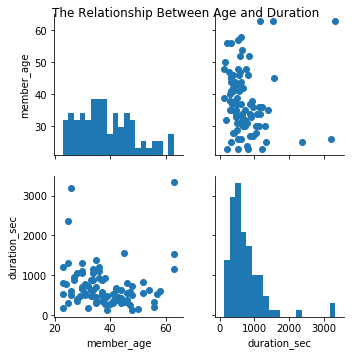

In [33]:
# plot matrix for age and duration: sample 500 so that plots are clearer. 
samples = np.random.choice(df_clean.shape[0],100, replace = False)
df_top8_samp = df_clean.loc[samples,:]
x=['member_age','duration_sec']
g = sb.PairGrid(data = df_top8_samp, vars = x)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
g.fig.suptitle('The Relationship Between Age and Duration');

Based on heatmap pllot member age and duration are negatively correlated but this negative correlation is not strong. We have less samples in the older population.

### 4- Median of member age and trip duration for 4 top more frequent start station

In [104]:
start_stn = df_clean['start_station_name'].value_counts().nlargest(5)
start_stn

San Francisco Caltrain (Townsend St at 4th St)               11875
San Francisco Caltrain Station 2  (Townsend St at 4th St)    11533
San Francisco Ferry Building (Harry Bridges Plaza)           11503
Market St at 10th St                                         10904
Berry St at 4th St                                           10122
Name: start_station_name, dtype: int64

In [32]:
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)']
df_clean2 = df_clean.loc[df_clean['start_station_name'].isin(locs)]


(11.125375922188997, 84.874624077811)

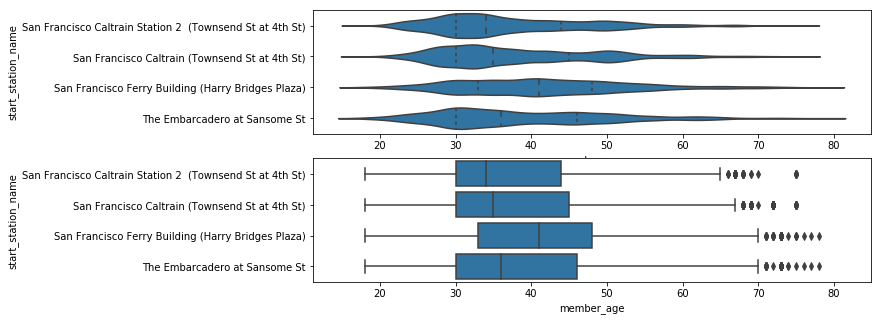

In [91]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(211)
ax1= sb.violinplot(data = df_clean2, y = 'start_station_name', x = 'member_age', color = base_color,
              inner = 'quartile')

# right plot: box plot
plt.subplot(212)
sb.boxplot(data = df_clean2, y = 'start_station_name', x = 'member_age', color = base_color)
plt.xlim(ax1.get_xlim()) # set x-axis limits to be same as upper plot

Median of member age for 4 top more frequent start station are almost the same  (abouit 36 years old)except San Francisco Ferry Building(Harry Bridges Plaza) that has greater median age than others(about 42 years old).

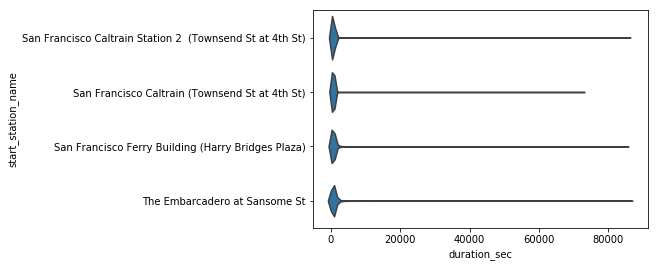

In [81]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df_clean2, y = 'start_station_name', x = 'duration_sec', color = base_color,
              inner = None)

Violon plot to show duration_sec for top 4 frequent stations are not explicit.So I prefer to use box plot instead. 

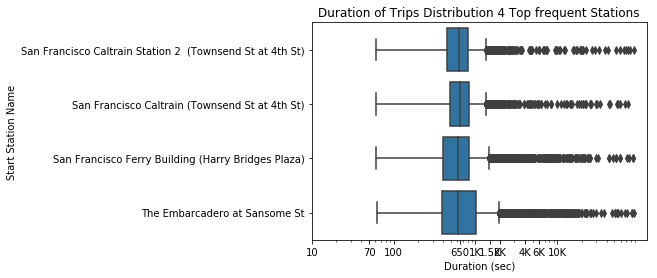

In [85]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df_clean2, y = 'start_station_name', x = 'duration_sec', color = base_color)
plt.xscale('log')
plt.xticks([10,50,100,650,1000,1500,2000,4000,6000,10000], [10,70,100,650,'1K','1.5K','2K','4K','6K','10K'])
plt.xlabel('Duration (sec)')
plt.ylabel('Start Station Name')
plt.title('Duration of Trips Distribution 4 Top frequent Stations');

In [33]:
# Check high outliers in duration of trips
len(df_clean2.query('duration_sec > 1500')['duration_sec'])/len(df_clean2['duration_sec'])

0.05323005561685168

The median of duration (second) are around 650 second. However, after 1500 second, there are a lot of high outliers around 5.3%.

### 5- compare  age of user types

(12.61411663740206, 83.78136932851064)

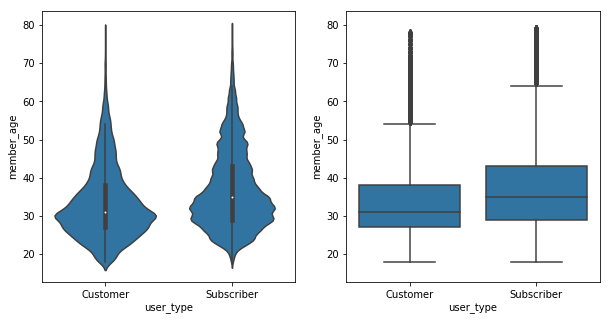

In [156]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_clean, x = 'user_type', y = 'member_age', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_clean, x = 'user_type', y = 'member_age', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

from  violon plot and box plot above, we can see that subscribers have more median age than customers.

### 6- Distribution of trip duration for all months of the year 2007

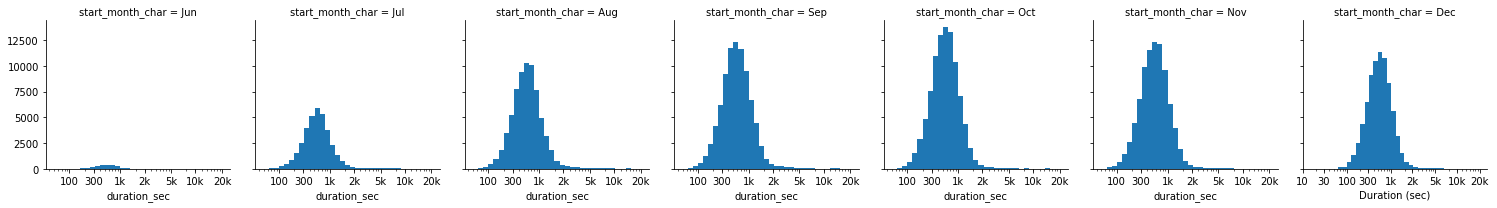

<Figure size 576x360 with 0 Axes>

In [173]:
g = sb.FacetGrid(data = df_clean, col = 'start_month_char')

log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
g.map(plt.hist, 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [10, 30, 100, 300, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (sec)')
plt.show()


Except June with totally low data to demonstrate, other months in data base have normal distibution with different peak and almost the same average duration (sec). Octomer have greatest peak.

### 7- Aversge value of age per gender

Text(0, 0.5, 'Avg. value of member age')

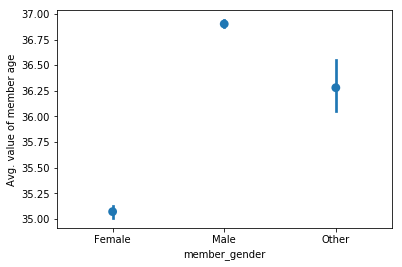

In [182]:
base_color = sb.color_palette()[0]
sb.pointplot(data = df_clean, x = 'member_gender', y = 'member_age', color = base_color, linestyles="")
plt.ylabel('Avg. value of member age')

Average value of member age for Male is almost 37.90 which is greater than female with average value of 35.1 and for other gender is 36.25.
The uncertainty in the mean based on variance and sample size for other gender is greater than others, and for female is greather than male.

### 8-Number of trips taken by different user group

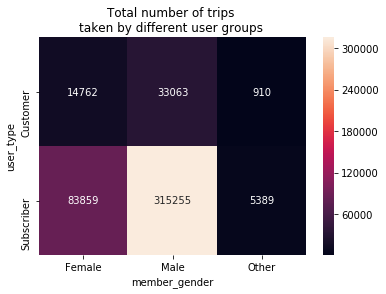

In [40]:

ct_counts = df.groupby(['member_gender', 'user_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'user_type', columns = 'member_gender', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd')
plt.title('Total number of trips \ntaken by different user groups ');

Number of male subscriber is the greatest and number of female customer is the smalest .

In [34]:
trips = df_clean.groupby(['user_type','member_gender']).size()
trips = trips.reset_index(name='trip_count')
total = trips.trip_count.sum()
trips = trips.pivot('user_type','member_gender', 'trip_count')/total*100


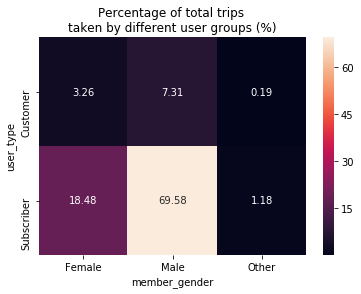

In [39]:

sb.heatmap(trips, annot=True, fmt=".2f");
plt.title('Percentage of total trips \ntaken by different user groups (%)');

18.84% of the trips are made by female subscribers, 69.58% by male subscriber. Only 3.26% by one-time female customers and 7.31 by male customers.

In [41]:
bin_edges = np.arange(10,90,10)
bin_idxs = pd.cut(df_rev['member_age'], bin_edges, right=False, include_lowest=True, labels=False).astype(int)

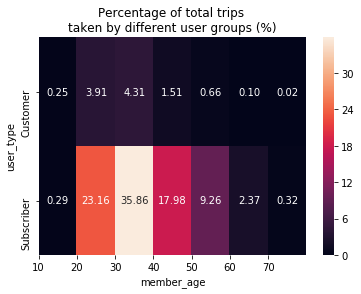

In [42]:
df0 = df_rev.groupby([bin_idxs, 'user_type']).size()
df0 = df0.reset_index(name='trip_count')
df0 = df0.pivot('user_type','member_age', 'trip_count')/total*100
sb.heatmap(df0, annot=True, fmt=".2f");
plt.xticks([0,1,2,3,4,5,6],['10','20','30','40','50','60','70'])
#plt.gca().invert_xaxis()
plt.title('Percentage of total trips \ntaken by different user groups (%)');

Subscribers group with rang age of 30-40 years old has the greatest percentage of the total trips(35.86%) and custumers group with rang age of 70-80 years old has the least percentage of the total trips(0.02) . 

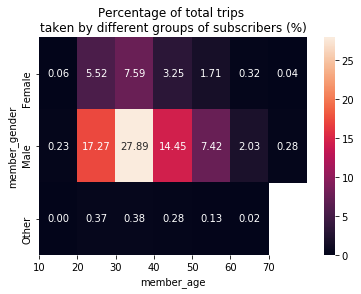

In [43]:
df1 = df_rev.query('user_type == "Subscriber"').groupby([bin_idxs, 'member_gender']).size()
df1 = df1.reset_index(name='trip_count')
df1 = df1.pivot('member_gender', 'member_age', 'trip_count')/total*100

sb.heatmap(df1, annot=True, fmt=".2f");
plt.xticks([0,1,2,3,4,5,6],['10','20','30','40','50','60','70'])
#plt.gca().invert_yaxis()
plt.title('Percentage of total trips \ntaken by different groups of subscribers (%)');

Male riders with the age rang 30-40 years has the greatest percentage of total trip.



By plotting the percentage of trips taken by different user groups with heatmaps, we can get a feel for the user behavior across gender, age, and their subscription status. 

## Multivariant exploration
### 1- Distribution of hourly trip count over the week¶

Text(0, 0.5, 'mean trip duration (sec)')

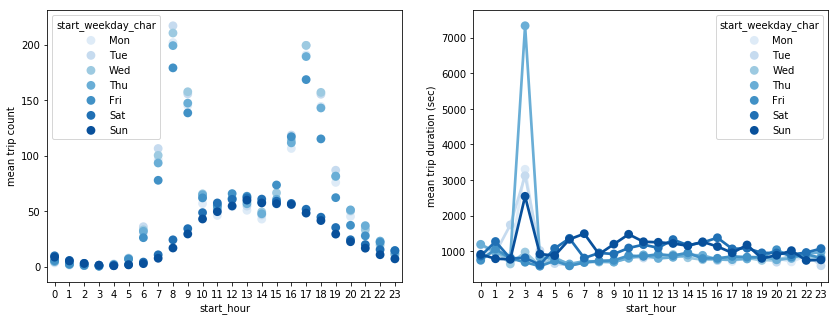

In [71]:
# create clustered point plots to compare mean trip count and mean trip duration by day of week and user type
df1 = df_clean.groupby(['start_weekday_char','start_hour']).size()/52
df1 = df1.reset_index(name='mean_trip_count')
df2 = df_clean.groupby(['start_weekday_char', 'start_hour'])['duration_sec'].mean()
df2 = df2.reset_index(name='mean_duration_sec')
fig, ax = plt.subplots(1, 2, figsize = [14,5])
sb.pointplot(data = df1, x = 'start_hour', y = 'mean_trip_count', hue = 'start_weekday_char',
palette = 'Blues', linestyles = '', ax=ax[0])
sb.pointplot(data = df2, x = 'start_hour', y = 'mean_duration_sec', hue = 'start_weekday_char',
palette = 'Blues', linestyles = '-', ax=ax[1])
ax[0].set_ylabel('mean trip count')
ax[1].set_ylabel('mean trip duration (sec)')



Start time 12:00,13:00,14:00, 15:00 and 16:00 on weekends have greatest number of mean trip count and start time 8:00 on Monday is the greatest number of mean trip count  during the week.

## 2-Trip duration by day of week and user type

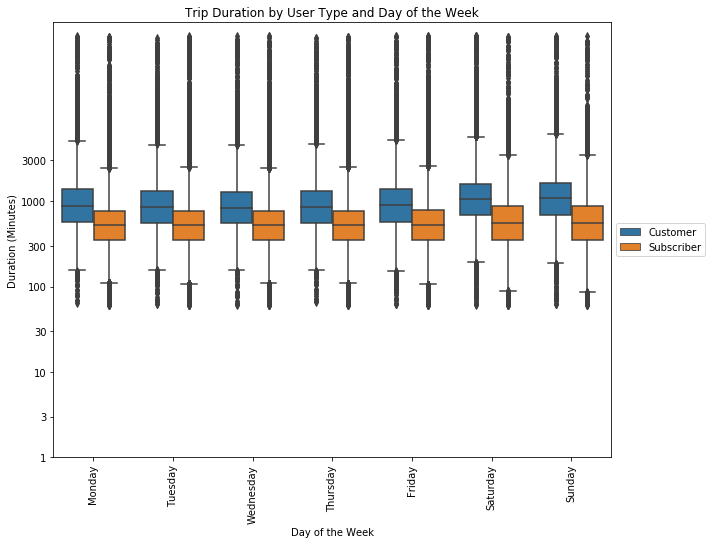

In [91]:
# create clustered box plots to compare trip duration by day of week and user type

df_clean['log_duration_sec'] = np.log10(df_clean['duration_sec'])
plt.figure(figsize=(10,8))
sb.boxplot(data = df_clean, x = 'start_weekday_char', y = 'log_duration_sec', hue = 'user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))

xticks = [0, 1, 2, 3, 4, 5, 6]
xlabels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(xticks, xlabels, rotation = 90)

ylabels = [1, 3, 10, 30, 100, 300, 1000, 3000]
yticks = np.log10(ylabels)
plt.yticks(yticks, ylabels)
plt.xlabel('Day of the Week')
plt.ylabel('Duration (Minutes)')
plt.title('Trip Duration by User Type and Day of the Week');


The trip duration for Customers is greater than Subscribers.It does not depend on the days of the week.

## 3-Trip duration by age and user type

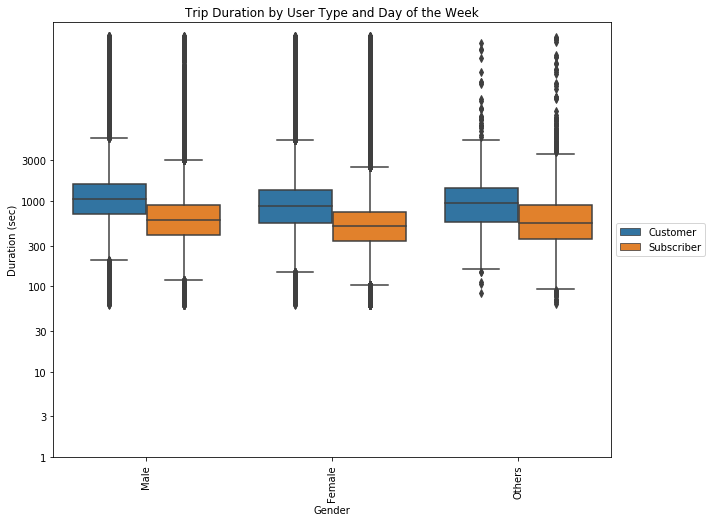

In [98]:
# create clustered box plots to compare trip duration by gender and user type

df_clean['log_duration_sec'] = np.log10(df_clean['duration_sec'])
plt.figure(figsize=(10,8))
sb.boxplot(data = df_clean, x = 'member_gender', y = 'log_duration_sec', hue = 'user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))

xticks = [0, 1, 2]
xlabels = ['Male','Female','Others']
plt.xticks(xticks, xlabels, rotation = 90)

ylabels = [1, 3, 10, 30, 100, 300, 1000, 3000]
yticks = np.log10(ylabels)
plt.yticks(yticks, ylabels)
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Trip Duration by User Type and Day of the Week');

The trip duration for Customers is greater than Subscribers.The trip duration  does not depend on gender.

C:\Users\Farhad\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Farhad\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


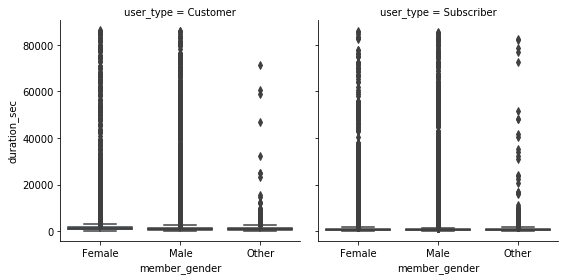

In [45]:
# Use faceting with boxplot to compare duration trip for each user type in each member gender
g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 4)
g.map(sb.boxplot, 'member_gender', 'duration_sec')

We should use log scale for duration for better plot

C:\Users\Farhad\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Farhad\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x576 with 0 Axes>

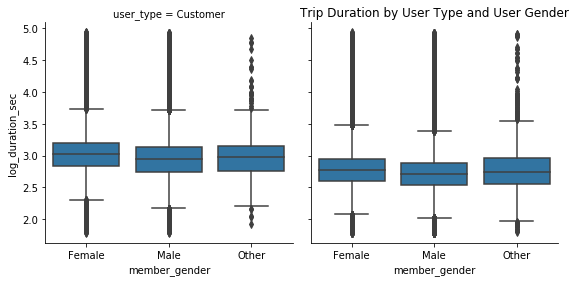

In [35]:
df_clean['log_duration_sec'] = np.log10(df_clean['duration_sec'])
plt.figure(figsize=(10,8))
g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 4)
g.map(sb.boxplot, 'member_gender', 'log_duration_sec')
plt.title('Trip Duration by User Type and User Gender');


like previous  plot , this plot also shows that the trip duration for Customers is greater than Subscribers.It does not depend on gender.

## 4-Ages of users in different user's group

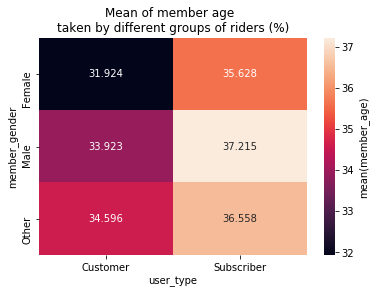

In [64]:
#Using heatmap for two categorical variables and one numeric variable is a clustered bar chart 
# only the aggregation of values changes. Instead of taking size after the groupby operation, we compute the mean across dataframe columns.
cat_means = df.groupby(['member_gender']).mean()['member_age']
cat_means = cat_means.reset_index(name = 'member_age_avg')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'member_age_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(member_age)'})
plt.title('Mean of member age  \ntaken by different groups of riders (%)');

Male subscribers have maximum mean of age and female customers have minimum mean of age.

C:\Users\Farhad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


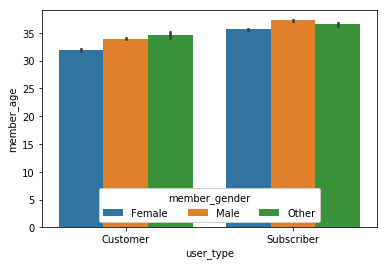

In [65]:
#An alternative approach for two categorical variables and one numeric variable is a clustered bar chart 
#using the barplot function instead of the countplot function
ax = sb.barplot(data = df_clean, x = 'user_type', y = 'member_age', hue = 'member_gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender')

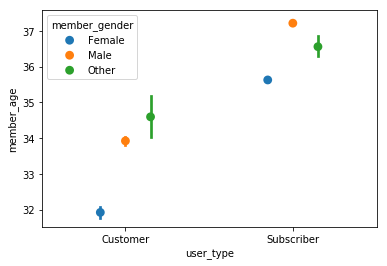

In [66]:
# use pointplot functions to add 2 categorical variable and one numerical variable in a clustered fashion
ax = sb.pointplot(data = df_clean, x = 'user_type', y = 'member_age', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")

You can see three different plot to show age of 2 different user types(customer or subscriber  for  different gender types. In my opinion pointplot is the best to show the difference between ages between these group.The uncertainty in the mean based on variance and sample size for "Other Gender" is greater than others.